# **노드 15. 뉴스 요약봇 만들기**

**텍스트 요약(Text Summarization)**

추출적 요약(Extractive Summarization)

*   추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식이에요.
*   가령, 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식이죠.
*   런데 꺼내온 3개의 문장이 원문에서 중요한 문장일 수는 있어도, 3개의 문장의 연결이 자연스럽지 않을 수는 있거든요.
*   결과로 나온 문장들 간의 호응이 자연스럽지 않을 수 있다는 것이죠.
*   딥 러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용한다고 해요.







추상적 요약(Abstractive Summarization)

*   원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것이죠.
*   여기서 새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미합니다.



Q. RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제가 있습니다. 이 문제를 해결하기 위해 LSTM과 GRU가 등장했고, 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장했지요. 이 문제의 이름은 무엇인가요?

*   장기 의존성(long term dependencies) 문제



2016년 9월 5일 신문 기사 "구글 인공지능 "뉴스 제목도 잘 뽑네"" 참조(https://zdnet.co.kr/view/?no=20160905114833&from=Mobile)

Q. 구글에서 텍스트 요약을 위해 시도했던 접근법 중에, 텍스트마이닝 분야의 '역문서빈도(IDF)같은' 지표를 활용해 문서 안에서 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식을 썼을 때의 문제점은 무엇이었나요?

*   원문에서 발췌하는 방식(Extractive summarization)의 요약 기법은 어색하거나 문법적으로 이상한 결과물을 만드는 문제가 있음



Q. 구글은 짧은 문장. 요약문을 생성하는 모델을 딥 러닝을 통해 end-to-end로 설계하도록 했어요. 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 이 딥 러닝 아키텍처의 이름은 무엇일까요?

*   seq2seq(sequence-to-sequence)



**인공 신경망으로 텍스트 요약 훈련시키기**

seq2seq 개요

*   원문을 첫 번째 RNN인 인코더로 입력하면, 인코더는 이를 하나의 고정된 벡터로 변환해요.
*   이 벡터를 문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)라고 합니다.
*   두 번째 RNN인 디코더는 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성하는 거죠.

미디움 "Abstractive text summary with Reinforcement Learning" 글 참조(https://medium.com/dl-for-product-and-service/abstractive-text-summary-with-reinforcement-learning-ab2458ab29d5)

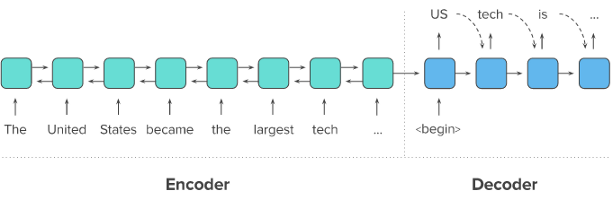

LSTM과 컨텍스트 벡터


*   LSTM이 바닐라 RNN과 다른 점은 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점이에요.
*   다시 말해, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state h와 cell state c 두 개의 값 모두 존재해야 한다는 뜻이죠.
*   깃허브 참조(http://colah.github.io/posts/2015-08-Understanding-LSTMs)

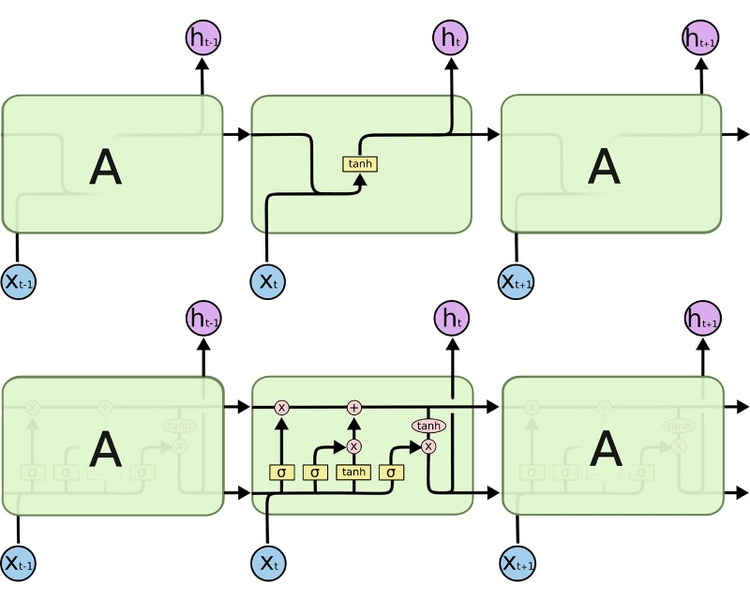



시작 토큰과 종료 토큰

*   시작 토큰 SOS와 종료 토큰 EOS는 각각 start of a sequence와 end of a sequence를 나타낸다.
*   seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 멈추지 않아요.
*   다시 말해 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있겠죠.
*   논문 "Neural Abstractive Text Summarization with
Sequence-to-Sequence Models" 참조(https://arxiv.org/pdf/1812.02303)

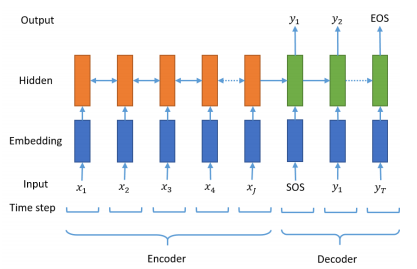






어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기

*   어텐션 메커니즘 기존의 컨텍스트 벡터보다 인코더의 정보를 적극적으로 활용하여 성능을 끌어올린다.
*   우리는 기존에 배운 seq2seq를 수정하고, 새로운 모듈을 붙여 모델의 성능을 높여볼 거예요.
*   기존의 seq2seq는 인코더의 마지막 time step의 hidden state를 컨텍스트 벡터로 사용했어요.
*   하지만 RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU)의 한계로 인해 이 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태가 됩니다.
*   어텐션 메커니즘(Attention Mechanism) 은 이와 달리, 인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것입니다.
*   하지만 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식입니다.
*   seq2seq 모델이라면 디코더로 전달되는 인코더의 컨텍스트 벡터는 인코더의 마지막 스텝의 hidden state인 h5가 되겠지만, 어텐션 메커니즘이 적용된 seq2seq인 Attentional seq2seq이라면 인코더의 컨텍스트 벡터는 예를 들어 0.2h1+0.3h2+0.1h3+
0.15h4+0.25h50.2h1+0.3h2+0.1h3+0.15h4+0.25h5가 될 수도 있는 것입니다.
*   여기서 주의해야 할 것은, 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점입니다.(즉, 디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것입니다.)
*   이렇게 디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측에 활용하면, 디코더가 좀 더 정확한 예측을 할 수 있게 돼요.  
*   이러한 Attention 기법은 seq2seq을 비롯하여 향후 다양한 딥러닝 분야를 획기적으로 발전시킨 핵심 개념이 됩니다.
*   특히 자연어처리 분야에서는 두말할 것도 없겠죠? 아직은 Attention 개념이 명확하게 와닿지 않을지라도, 앞으로도 수차례에 걸쳐 이 개념에 대해 더욱 깊이 있게 다루게 될 것입니다.

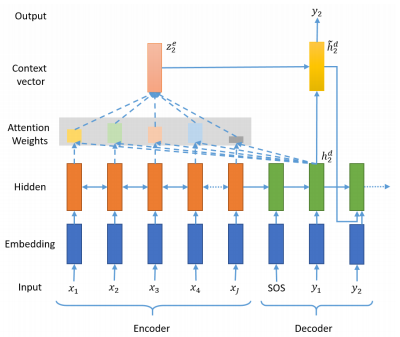









Q. SOS 토큰과 EOS 토큰을 사용하는 이유가 무엇인가요?

*   SOS 토큰은 디코더에 입력되는 첫 번째 토큰으로 사용되며, 디코더가 문장 생성을 시작하도록 합니다. EOS 토큰은 디코더가 문장 생성을 끝내야 할 때 사용되며, 디코더가 문장 생성을 멈추게 합니다. 즉, SOS 토큰과 EOS 토큰은 seq2seq 모델이 문장 생성을 시작하고 끝내는 시점을 알려주는 역할을 하기 위함 입니다.


Q. Attention 모델과 seq2seq 모델의 차이점이 무엇인가요?

*   Attention 모델에서는 모든 스텝의 hidden state의 정보가 컨텍스트 벡터에 반영됩니다. 그리고 디코더가 출력을 생성할 때, 컨텍스트 벡터에 반영된 각각의 hidden state에 대한 가중치 값은 디코더의 현재 스텝이 어딘지에 따라 다르게 반영됩니다.



**데이터 준비하기**

In [ ]:
!mkdir -p content/work/news_summarization/data

오늘 우리가 텍스트 요약 모델 학습에 사용할 데이터셋은 Kaggle에서 제공된 아마존 리뷰 데이터셋입니다.

링크 : https://www.kaggle.com/snap/amazon-fine-food-reviews

위 링크에서 Reviews.csv 파일(286.97 MB)을 다운로드해 위에 생성한 디렉토리에 넣고 압축을 풀어주세요. 혹은 아래와 같이 진행하셔도 됩니다.

In [ ]:
! wget https://d3s0tskafalll9.cloudfront.net/media/documents/Reviews.csv.zip
! mv Reviews.csv.zip content/work/news_summarization/data
! cd content/work/news_summarization/data && unzip Reviews.csv.zip

--2026-02-02 06:36:45--  https://d3s0tskafalll9.cloudfront.net/media/documents/Reviews.csv.zip
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 13.249.182.118, 13.249.182.60, 13.249.182.14, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|13.249.182.118|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 120062355 (114M) [application/zip]
Saving to: ‘Reviews.csv.zip’

Reviews.csv.zip     100%[===================>] 114.50M  25.7MB/s    in 4.7s    

2026-02-02 06:36:51 (24.3 MB/s) - ‘Reviews.csv.zip’ saved [120062355/120062355]

Archive:  Reviews.csv.zip
  inflating: Reviews.csv             


In [ ]:
# NLTK의 불용어(stopwords)를 사용할 거에요.
# NLTK는 Natural Language Toolkit의 축약어로 영어 기호, 통계, 자연어 처리를 위한 라이브러리에요.
# 이 NLTK에는 I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있어요.
# 이를 이용해 다운로드한 리뷰 파일에서 불용어를 제거하는 작업을 진행할 예정이에요.

!pip install nltk

In [ ]:
# BeautifulSoup는 문서를 파싱 하는데 사용하는 패키지입니다.

!pip install beautifulsoup4

In [ ]:
# NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지도 함께 불러와 볼까요.

import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

import torch
from collections import Counter

import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

print('=3')

=3


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# 링크에서 다운로드 받은 데이터(Reviews.csv)는 총 568,454개의 샘플을 갖고 있어요.
# 시간상 여기서는 모든 샘플을 사용하지는 않고, 간단히 10만 개의 샘플만 사용해볼게요.

data = pd.read_csv(
    "/content/content/work/news_summarization/data/Reviews.csv",
    nrows=100000
)

print("전체 샘플수 :", len(data))

전체 샘플수 : 100000


In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# 사실 전체 데이터 중 Summary 열과 Text 열만 훈련에 사용할 거라, 이 두 개의 열만 별도로 저장하고, 다시 출력해볼게요.
# 데이터프레임 data의 Text와 Summary 컬럼의 데이터만 남기는 코드를 작성하세요.

data = data[['Text', 'Summary']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

# 2개의 열이 남았네요.
# Text 열의 내용을 요약한 것이 Summary 열이에요.
# 여기서는 인공 신경망을 통해 Text 시퀀스를 입력받으면, Summary 시퀀스를 예측하도록 인공 신경망을 훈련시킬 거예요.

,Text,Summary
6121,I am a Saba fan. It is expensive for this but...,Saba
86380,I WOULD LIKE TO BE ABLE TO BUY CHOC. JELLO COO...,MORE FLAVORS IN THIS SIZE
68773,"great rice, cooks up nice, tastes good, Amazon...",rice
76420,I love Stash mint green & white teas but this ...,Not my favorite flavor
31034,"I love, love, love the Salt & Pepper Popchips....",Yum!
30841,"I really enjoy sweet potato chips, sweet potat...","If you enjoy sweet potatoes, you'll enjoy these"
54582,"I got this for my cat, thinking it was 'human ...",not the best for my cat
33952,In ayurvedic medidicne and in yoga exxercises ...,nice product
22296,I've tried other Nori Flakes and loved them. I...,Emerald Cove Nori Flakes
1636,These are the best snacks for me as I am a lap...,yummy popchips


**데이터 정리하기**

중복 샘플과 NULL 값이 존재하는 샘플 제거

In [ ]:
# 우선 데이터의 중복 샘플 유무를 확인해 볼게요.

print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

# 중복을 제외한다면 Text에는 88,426개, Summary에는 72,348개의 유니크한 데이터가 존재해요.
# 사실 이 데이터의 Summary는 'Smelly'나 'Good Product'와 같이 아주 간단한 요약들도 많아서 Text가 달라도 Summary는 동일할 수 있어요.
# 하지만 Text 자체가 중복이 된 경우는 중복 샘플이므로 제거해야겠죠.

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [ ]:
# 데이터프레임의 drop_duplicates()를 사용하면, 손쉽게 중복 샘플을 제거할 수 있어요.
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다

data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

# 중복이 제거되면서 샘플 수가 88,426개로 줄어들었어요.
# 그런데 만약 데이터 Null 값을 가지는 샘플이 있었다면, drop_duplicates()가 중복된 Null들을 지워주기는 하겠지만, 여전히 Null 값 한 개가 어딘가 남아있을 수 있어요.
# 데이터에 Null 값이 남아있는지 볼게요.

전체 샘플수 : 88426


In [ ]:
# 데이터프레임에 Null 값이 있는지 확인하는 방법은 .isnull().sum()을 사용하면 알아볼 수 있어요.

print(data.isnull().sum())

Text       0
Summary    1
dtype: int64


In [ ]:
# Summary에 1개의 Null 값이 있네요.
# 데이터프레임에서 Null을 제거할 때는 dropna() 함수를 사용하면 돼요.

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

# 전체 샘플 수가 1개 줄어들어 88,425개의 샘플이 남았네요.
# 지금까지 중복 샘플과 Null 값이 있는 샘플들을 제거해보았는데 10만 개의 샘플 중 1만 개 이상의 샘플이 제거되었어요.

전체 샘플수 : 88425


텍스트 정규화와 불용어 제거

*   살아남은 88,425개의 샘플에는 수많은 단어들이 있어요.
*   그런데 사실 그 단어들 중에서는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있어요.
*   예를 들어서 it'll은 it will과 같고, mustn't과 must not은 사실 같은 표현이죠.
*   이런 경우 기계가 굳이 이들을 마치 다른 단어로 간주하게 해서 연산량을 늘리는 것보다는 기계 학습 전에 미리 같은 표현으로 통일시켜주는 것이 기계의 연산량을 줄일 수 있는 방법이에요.
*   이러한 방법론을 텍스트 처리에서는 텍스트 정규화(text normalization) 라고 해요.



In [ ]:
# 여기서는 텍스트 정규화를 위한 사전(dictionary)을 아래와 같이 구성할 거예요.
# 이 사전은 링크에서 참고하여 만들었어요.(https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)

contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [ ]:
# 일반적으로 텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어들이 존재해요.
# 이를 불용어(stopwords)라고 불러요.
# 때로는 불용어를 제거하는 것이 자연어 처리의 성능을 높이는 방법일 수 있어요.
# 여기서는 NLTK에서 제공하는 불용어 리스트를 참조해, 샘플에서 불용어를 제거할 거예요.

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

# NLTK에서 미리 정의하여 제공하고 있는 불용어는 총 179개라는 것을 볼 수 있죠.
# 이를 사용하여 불용어를 제거할 거예요.
# 이 작업 외에도 모든 영어 문자는 소문자로 만들고, 섞여있는 html 태그를 제거하고, 정규 표현식을 통해 각종 특수문자를 제거해서 정말 필요한 내용만 잘 학습할 수 있도록 처리할 거예요.

불용어 개수 : 198
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "

In [ ]:
# 함수의 하단을 보면, NLTK를 이용해 불용어를 제거하는 파트가 있는데, 이는 Text 전처리 시에서만 호출하고 이미 상대적으로 문장 길이가 짧은 Summary 전처리할 때는 호출하지 않을 예정이에요.
# Abstractive한 문장 요약 결과문이 자연스러운 문장이 되려면 이 불용어들이 Summary에는 남아 있는 게 더 좋을 것 같습니다.
# 이 처리를 위해서 함수의 인자로 remove_stopwords를 추가하고, if문을 추가했어요.

# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah

    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('=3')

=3


In [ ]:
# 전처리 전, 후의 결과를 확인하기 위해서 임의의 text와 summary를 만들어 함수를 호출해 볼까요.

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

# 결과를 보면 기본적으로 모든 알파벳이 소문자로 변환되고, <br />과 같은 html 태그가 제거되었죠.
# (or finish)와 같은 괄호로 묶였던 단어 시퀀스가 제거된 것도 확인할 수 있어요.
# 또한 특수문자가 제거되면서 영어만 남았어요.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [ ]:
# 이제 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행해볼게요.
# 이때, Text의 경우에는 불용어를 제거하고, Summary의 경우에는 불용어를 제거하지 않을 것이므로 따로 호출해서 진행해야 해요.
# 먼저 Text를 전처리하고, 결과를 확인하기 위해서 상위 5개의 줄을 출력해볼게요.

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다.
clean_text = []

for sentence in data['Text']:
    clean_text.append(preprocess_sentence(sentence))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better', 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo', 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch', 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal', 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal']


In [ ]:
# 이제 Summary에 대해서 전처리 함수를 호출해 줄 때는, 불용어 제거를 수행하지 않는다는 의미에서 두 번째 인자로 False를 넣어줄게요.

# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다.
clean_summary = []

for sentence in data['Summary']:
    clean_summary.append(preprocess_sentence(sentence, remove_stopwords=False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

/tmp/ipython-input-569651785.py:8: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거


Summary 전처리 후 결과:  ['good quality dog food', 'not as advertised', 'delight says it all', 'cough medicine', 'great taffy']


In [ ]:
# 이렇게 텍스트 정제의 과정을 거친 후에는 다시 한번 빈(empty) 샘플이 생겼는지 확인해보는 것이 좋아요.
# 정제 전에는 데이터가 존재했지만, 정제 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있어요.
# 이렇게 되면 샘플 자체가 빈 값을 가지게 되겠죠.
# 보다 쉽게 확인하기 위해 데이터들을 데이터프레임에 재저장할게요. 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체해요.

data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('=3')

=3


In [ ]:
# 이전과 같이 .isnull().sum()을 사용해서 Null 값이 생겼는지 해볼게요.

data.isnull().sum()

,0
Text,0
Summary,70


In [ ]:
# Summary 열에서 70개의 Null 값이 생겼네요.
# 원래는 단어가 있었는데, 정제 과정에서 모든 단어가 제거되어 빈 샘플이 70개나 생겼다는 의미예요.
# 이 샘플들은 모두 제거해줄게요.

data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


**훈련데이터와 테스트데이터 나누기**

샘플의 최대 길이 정하기

*   필요 없는 단어를 모두 솎아낸 데이터를 가지게 되었으니, 이제 훈련에 사용할 샘플의 최대 길이를 정해줄 차례에요.
*   Text와 Summary의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화해서 볼게요.



텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


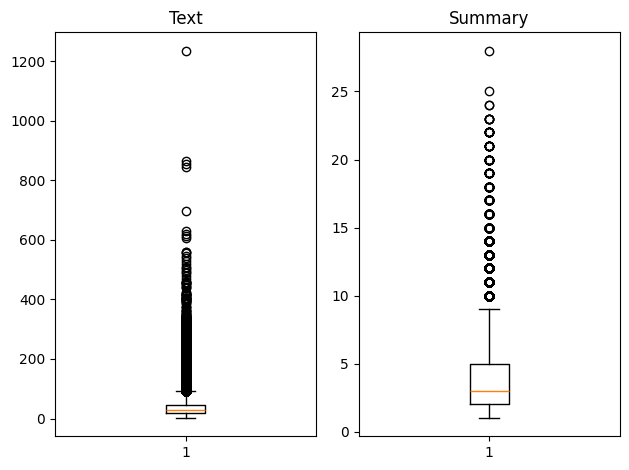

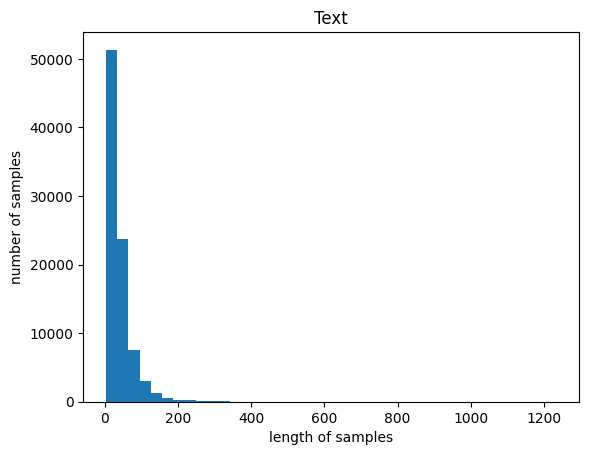

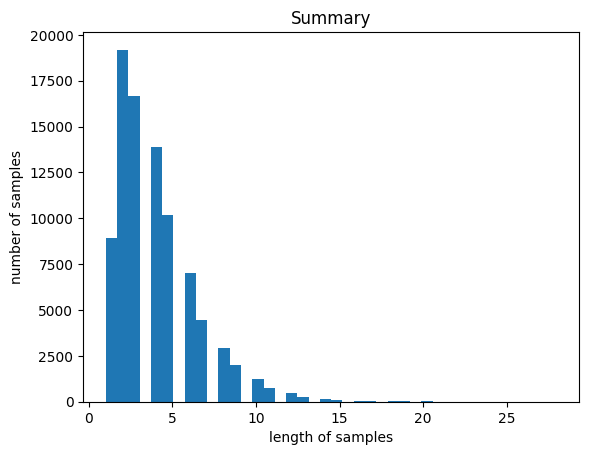

In [ ]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

# 위의 그래프처럼, 많은 양의 데이터를 다룰 때는 데이터를 시각화하여 보는 것이 도움이 돼요.
# 위에서부터 차례대로 그래프는 각각 실제 텍스트와 요약의 길이 분포, 실제 텍스트 샘플 길이별 개수, 요약본 샘플 길이별 개수를 나타내고 있어요.
# Text의 경우 최소 길이가 2, 최대 길이가 1,235로 그 차이가 굉장히 크죠. 하지만 평균 길이는 38로 시각화된 그래프로 봤을 때는 대체적으로는 100 내외의 길이를 가진다는 것을 확인할 수 있어요.
# Summary의 경우 최소 길이가 1, 최대 길이가 28, 그리고 평균 길이가 4로 Text에 비해 상대적으로 길이가 매우 짧아요. 그래프로 봤을 때에도 대체적으로 10이하의 길이를 가지고 있네요.

In [ ]:
# 이로부터 Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정해볼게요.

text_max_len = 50
summary_max_len = 8
print('=3')

=3


In [ ]:
# 각각 50과 8로 정했는데 이 길이를 선택했을 때, 얼마나 많은 샘플들을 자르지 않고 포함할 수 있는지 통계로 확인하는 편이 객관적으로 길이를 결정하는 데 도움이 될거예요.
# 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수를 만들어서 좀 더 정확하게 판단해볼게요.

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('=3')

=3


In [ ]:
# 이렇게 만든 함수를 Text와 Summary에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 볼 수 있겠죠.

below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len, data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [ ]:
# 각각 50과 8로 패딩을 하게 되면 해당 길이보다 긴 샘플들은 내용이 잘리게 되는데, Text 열의 경우에는 약 23%의 샘플들이 내용이 망가지게 된다고 하네요.
# 우리는 정해진 길이에 맞춰 자르는 것이 아니라, 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제할게요.
# Text와 Summary를 담고 있는 data 데이터프레임을 위에서 임의로 정의한 text_max_len과 summary_max_len의 길이보다 큰 샘플을 제외하는 코드를 작성하세요.(힌트 : apply 함수와 lamda식을 사용)

data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65818


시작 토큰과 종료 토큰 추가하기

*   seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요가 있어요.
*   이번 실습에서는 시작 토큰은 sostoken, 종료 토큰은 eostoken이라 임의로 명명하고 앞, 뒤로 추가할 거예요.
*   디코더의 입력에 해당하면서 시작 토큰이 맨 앞에 있는 문장의 이름을 decoder_input, 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장의 이름을 decoder_target이라고 이름을 정했어요. 두 개의 문장 모두 Summary 열로부터 만들 거예요.



In [ ]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.

data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [ ]:
# 앞뒤로 토큰이 잘 붙었죠? 인코더의 입력, 디코더의 입력과 레이블을 각각 다시 Numpy 타입으로 저장해 줄게요.

encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('=3')

=3


In [ ]:
# 훈련 데이터와 테스트 데이터를 분리하는 방법은 분리 패키지를 사용하는 방법, 또는 직접 코딩을 통해서 분리하는 방법 등 여러 가지 방법이 있을 텐데 여기서는 직접 해볼게요.
# 우선, encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스를 만들어줄게요.

indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[48664 10596 33105 ... 32350 36695 39716]


In [ ]:
# 이 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의해 주면 잘 섞인 샘플이 되겠죠.

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('=3')

=3


In [ ]:
# 이제 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리해 줄게요.
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의해 줄게요.

n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13163


In [ ]:
# 이렇게 정의한 테스트 데이터의 개수를 이용해 전체 데이터를 양분할게요.
# :표시의 위치에 주의해 주세요.

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

# 훈련 데이터와 테스트 데이터가 각각 52,655개와 13,163개로 잘 분리된 것을 볼 수 있어요!

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


**정수 인코딩**

단어 집합(vocabulary) 만들기 및 정수 인코딩

*   이제 기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 바꾸어 주어야 해요.
*   이를 위해서는 각 단어에 고유한 정수를 맵핑하는 작업이 필요해요. 이 과정을 단어 집합(vocabulary) 을 만든다고 표현해요.
*   훈련 데이터에 대해서 단어 집합을 만들어볼게요.
*   우선, 원문에 해당되는 encoder_input_train에 대해서 단어 집합을 만들게요.
*   Keras의 토크나이저를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있어요.



In [ ]:
def src_tokenizer(text): # 토크나이저 정의
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # 특수문자 제거
    return text.split()  # 공백 기준 토큰화

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩과 UNK 토큰 추가
    word_counter = Counter()

    for text in texts:
        word_counter.update(src_tokenizer(text))  # 단어 빈도수 계산

    # 단어 집합 생성 (빈도가 높은 순서대로)
    for word, _ in word_counter.most_common():
        if word not in vocab:
            vocab[word] = len(vocab)

    return vocab

src_vocab = build_vocab(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('=3')

# 이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요.
# 현재 생성된 단어 집합은 src_tokenizer.word_index에 저장되어 있어요.
# 그런데 우리는 이렇게 만든 단어 집합에 있는 모든 단어를 사용하는 것이 아니라, 빈도수가 낮은 단어들은 훈련 데이터에서 제외하고 진행하려고 해요.

=3


In [ ]:
# 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요.
# src_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻을 수 있어요.

threshold = 7

# 전처리된 데이터 사용
text_data = data['Text'].tolist()
summary_data = data['Summary'].tolist()
# 단어 빈도수 계산
word_counter = Counter()
for text in text_data:
    word_counter.update(text.split())

total_cnt = len(word_counter)  # 전체 단어 개수
total_freq = sum(word_counter.values())  # 전체 단어 등장 횟수
rare_cnt = sum(1 for count in word_counter.values() if count < threshold)  # 희귀 단어 개수
rare_freq = sum(count for count in word_counter.values() if count < threshold)  # 희귀 단어 등장 횟수

# 희귀 단어를 제외한 단어 사전 구축
vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩 및 미등록 단어 추가
word_index = {word: idx + 2 for idx, (word, count) in enumerate(word_counter.items()) if count >= threshold}

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# encoder_input_train에는 3만여 개의 단어가 있네요.
# 그 아래의 통계 정보들을 해석해볼까요?
# 등장 빈도가 threshold 값인 7회 미만, 즉 6회 이하인 단어들은 단어 집합에서 무려 70% 이상을 차지하네요.
# 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 3.39%밖에 되지 않아요.

단어 집합(vocabulary)의 크기 : 35610
등장 빈도가 6번 이하인 희귀 단어의 수: 26409
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9201
단어 집합에서 희귀 단어의 비율: 74.16175231676495
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.988036889250968


In [ ]:
# 그래서 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거하고자 합니다.
# 위에서 이를 제외한 단어 집합의 크기를 8천여 개로 계산했는데, 이와 비슷한 값으로 어림잡아 단어 집합의 크기를 8,000으로 제한해볼게요.
# 토크나이저를 정의할 때 num_words의 값을 정해주면, 단어 집합의 크기를 제한할 수 있어요.

src_vocab_size = 8000

def build_limited_vocab(texts, vocab_size):
    vocab = {"<PAD>": 0, "<UNK>": 1}  # 패딩과 UNK 토큰 추가
    word_counter = Counter()

    for text in texts:
        word_counter.update(src_tokenizer(text))  # 단어 빈도수 계산

    # 빈도가 높은 상위 vocab_size - 2개 단어만 선택 (PAD, UNK 포함)
    for word, _ in word_counter.most_common(vocab_size - 2):
        vocab[word] = len(vocab)

    return vocab

src_vocab = build_limited_vocab(encoder_input_train, src_vocab_size)
print('=3')

# texts_to_sequences()는 생성된 단어 집합에 기반하여 입력으로 주어진 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행해요.
# 현재 단어 집합의 크기를 8,000으로 제한했으니까 이제 8,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않아요.

=3


In [ ]:
def text_to_sequence(texts, vocab):
    sequences = []
    for text in texts:
        sequence = [vocab.get(word, vocab["<UNK>"]) for word in src_tokenizer(text)]
        sequences.append(sequence)
    return sequences

# 텍스트 데이터 정수 시퀀스로 변환
encoder_input_train_seq = text_to_sequence(encoder_input_train, src_vocab)
encoder_input_test_seq = text_to_sequence(encoder_input_test, src_vocab)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train_seq[:3])
print(encoder_input_test_seq[:3])

# 이제 더 이상 텍스트 데이터가 아니라 정수가 나오고 있어요.

[[130, 89, 36, 1215, 65, 363, 36, 48, 110, 2127, 2693, 1, 106, 161, 1752, 2844, 96, 1250, 7, 27, 60, 436, 467, 10, 762, 1165, 608, 551, 116, 43, 76, 10, 18, 3, 207, 57, 212], [26, 9, 37, 41, 1187, 281, 226, 10, 949, 151, 310, 1193, 244, 41], [269, 111, 86, 1977, 1332, 260, 801, 255, 7, 687, 13, 497, 1977, 782, 1977, 40, 687, 10, 1977, 3890, 544, 240, 18]]
[[1330, 129, 899, 1702, 631, 8, 436, 562, 5831, 633, 3, 42, 141, 3, 798, 225, 129, 633, 1808, 1002], [68, 779, 11, 1282, 421, 63, 834, 421, 447, 246, 277, 1215, 29, 1, 9, 421, 4135, 421, 1, 654, 1739, 63, 654, 7290, 248, 397, 421, 140, 950, 14, 3732, 283], [111, 9, 197, 10, 822, 331, 41, 1144, 4, 554, 41, 22, 8, 307, 45, 1070, 452, 15, 741, 1, 123, 212]]


In [ ]:
def tar_tokenizer(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r"[^a-zA-Z0-9]+", " ", text)  # 특수문자 제거
    return text.split()  # 공백 기준 토큰화

tar_vocab = build_vocab(decoder_input_train)
print('=3')

# 이제 단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여되었어요.
# 이는 tar_tokenizer.word_index에 저장되어 있어요.

=3


In [ ]:
# tar_tokenizer.word_counts.items()에는 단어와 각 단어의 등장 빈도수가 저장돼 있는데, 이를 통해서 통계적인 정보를 얻어서, 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인해볼게요.

threshold = 6

word_counter = Counter()
for text in decoder_input_train:
    word_counter.update(tar_tokenizer(text))  # 각 문장의 단어 빈도 계산

# 전체 단어 개수 및 등장 빈도 계산
total_cnt = len(word_counter)  # 전체 단어 개수
total_freq = sum(word_counter.values())  # 전체 단어 등장 횟수
rare_cnt = sum(1 for count in word_counter.values() if count < threshold)  # 희귀 단어 개수
rare_freq = sum(count for count in word_counter.values() if count < threshold)  # 희귀 단어 등장 횟수

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10534
등장 빈도가 5번 이하인 희귀 단어의 수: 8161
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2373
단어 집합에서 희귀 단어의 비율: 77.47294475033226
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.919754628712232


In [ ]:
# 등장 빈도가 5회 이하인 단어들은 단어 집합에서 약 77%를 차지하고 있네요.
# 하지만 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 매우 적은 수치인 5.87%밖에 되지 않아요.
# 아까 했던 것과 동일하게 이 단어들은 모두 제거할게요.
# 어림잡아 2,000을 단어 집합의 크기로 제한할게요.

tar_vocab_size = 2000
tar_vocab = build_limited_vocab(decoder_input_train + decoder_target_train, tar_vocab_size)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train_seq = text_to_sequence(decoder_input_train, tar_vocab)
decoder_target_train_seq = text_to_sequence(decoder_target_train, tar_vocab)
decoder_input_test_seq = text_to_sequence(decoder_input_test, tar_vocab)
decoder_target_test_seq = text_to_sequence(decoder_target_test, tar_vocab)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train_seq[:5])
print('target')
print('decoder ',decoder_target_train_seq[:5])

# 정상적으로 정수 인코딩 작업이 끝났어요. 현재 decoder_input_train과 decoder_target_train에는 더 이상 숫자 2,000이 넘는 숫자들은 존재하지 않아요.
# 그런데 다음 작업인 패딩 하기로 넘어가기 전에 한 가지 점검해야 할 것이 있어요.
# 전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 이제 빈(empty) 샘플이 되었을 가능성이 있어요.
# 이 현상은 길이가 상대적으로 길었던 원문(Text)의 경우에는 문제가 별로 없겠지만, 애초에 평균 길이가 4밖에 되지 않았던 요약문(Summary)의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높겠죠.
# 요약문에서 길이가 0이 된 샘플들의 인덱스를 받아와볼게요.
# 여기서 주의할 점은 요약문인 decoder_input에는 sostoken 또는 decoder_target에는 eostoken이 추가된 상태이고, 이 두 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높으므로 단어 집합 제한에도 삭제되지 않아요.
# 그래서 이제 길이가 0이 된 요약문의 실제 길이는 1로 나올 거예요.
# 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아 있을 테니까요.

input
input  [[2, 1, 1, 648], [2, 5, 10, 17, 49, 248], [2, 52, 127], [2, 1825, 8, 806], [2, 282, 27, 161]]
target
decoder  [[1, 1, 648, 3], [5, 10, 17, 49, 248, 3], [52, 127, 3], [1825, 8, 806, 3], [282, 27, 161, 3]]


In [ ]:
# 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장해볼게요.
# 이 샘플들은 모두 삭제할 거예요.

drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

# 훈련 데이터와 테스트 데이터 모두 일정량의 샘플들이 제거된 것을 확인할 수 있어요.

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


패딩하기

In [ ]:
# 텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 해야 해요.
# 아까 정해두었던 최대 길이로 패딩 해 줄 거에요.
# 최대 길이보다 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이를 맞춰줄게요.

from torch.nn.utils.rnn import pad_sequence

# 텐서 변환 함수 (리스트 → PyTorch 텐서)
def convert_to_tensor(sequences):
    return [torch.tensor(seq, dtype=torch.long) for seq in sequences]

# 패딩 적용 함수 (PyTorch `pad_sequence()` 활용)
def pad_sequences_pytorch(sequences, maxlen, padding_value=0):
    sequences = convert_to_tensor(sequences)  # 리스트를 텐서로 변환
    padded_seqs = pad_sequence(sequences, batch_first=True, padding_value=padding_value)  # 패딩 적용
    return padded_seqs[:, :maxlen]  # maxlen 길이로 자르기 (최대 길이 초과 방지)

# 패딩 적용
encoder_input_train = pad_sequences_pytorch(encoder_input_train_seq, maxlen=text_max_len)
encoder_input_test = pad_sequences_pytorch(encoder_input_test_seq, maxlen=text_max_len)
decoder_input_train = pad_sequences_pytorch(decoder_input_train_seq, maxlen=summary_max_len)
decoder_target_train = pad_sequences_pytorch(decoder_target_train_seq, maxlen=summary_max_len)
decoder_input_test = pad_sequences_pytorch(decoder_input_test_seq, maxlen=summary_max_len)
decoder_target_test = pad_sequences_pytorch(decoder_target_test_seq, maxlen=summary_max_len)

print('=3')

# 이제 학습에 필요한 데이터 전처리가 모두 끝났어요.

=3


**모델 설계하기**

In [ ]:
# 인코더 LSTM 1을 참고해서 나머지 인코더의 LSTM 2, LSTM 3의 코드를 완성하세요.

import torch.nn as nn
import torch.nn.functional as F

# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256
src_vocab_size = len(src_vocab)  # 단어 집합 크기

# 인코더
class Encoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            embedding_dim, hidden_size, num_layers=num_layers,
            dropout=dropout, batch_first=True
        )

    def forward(self, x): # 인코더의 임베딩 층
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded)  # LSTM 실행
        return output, hidden, cell

# 인코더 모델 생성
encoder = Encoder(src_vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4)

# 임베딩 벡터의 차원은 128로 정의하고, hidden state의 크기를 256으로 정의했어요.
# hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터에요.
# 이 파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해하면 돼요.
# 다른 신경망과 마찬가지로, 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니에요.
# 인코더의 LSTM은 총 3개의 층으로 구성해서 모델의 복잡도를 높였어요.
# hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면, 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있죠.
# 3개의 층을 지나서 인코더로부터 나온 출력 벡터는 디코더로 보내줘야겠죠?

In [ ]:
# 디코더 설계
class Decoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size, dropout=0.4, num_layers=3):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(
            embedding_dim, hidden_size, num_layers=num_layers, dropout=dropout,
            batch_first=True
        )

    def forward(self, x, hidden, cell): # 디코더의 임베딩 층
        embedded = self.embedding(x)
        output, (hidden, cell) = self.lstm(embedded, (hidden, cell))  # 초기 상태를 인코더에서 전달받음
        return output, hidden, cell

# 디코더 모델 생성
decoder = Decoder(tar_vocab_size, embedding_dim, hidden_size, num_layers=3, dropout=0.4)

# 디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일해요.
# 하지만 LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요.

In [ ]:
# 디코더의 출력층
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, vocab_size):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.softmax_layer = nn.Linear(hidden_size, vocab_size)  # 출력층 정의

    def forward(self, encoder_input, decoder_input):
        # 인코더 실행
        encoder_output, hidden, cell = self.encoder(encoder_input)

        # 디코더 실행
        decoder_output, _, _ = self.decoder(decoder_input, hidden, cell)

        # 출력층 적용 (Softmax는 Loss 내부에서 적용되므로 생략 가능)
        output = self.softmax_layer(decoder_output)
        return output

# 모델 정의
model = Seq2Seq(encoder, decoder, tar_vocab_size)
print(model)

# 디코더의 출력층에서는 Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제를 풀어야 해요.
# 그렇기 때문에 Dense의 인자로 tar_vocab을 주고, 활성화 함수로 소프트맥스 함수를 사용하고 있어요.
# 지금까지 설계한 것은 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용하는 가장 기본적인 seq2seq에요.
# 그런데 디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법이 있어요! 바로 어텐션 메커니즘이에요.

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(8000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (decoder): Decoder(
    (embedding): Embedding(2000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (softmax_layer): Linear(in_features=256, out_features=2000, bias=True)
)


어텐션 메커니즘

*   어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다는 뜻이에요.
*   참고로 여기서 사용하는 어텐션 함수는 Luong 스타일의 어텐션입니다.



In [ ]:
# 아래와 같이 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정해 봅시다.

class Attention_dot(nn.Module):
    def __init__(self, hidden_size):
        super(Attention_dot, self).__init__()
        self.attn = nn.Linear(hidden_size, hidden_size)  # 어텐션 가중치
        self.v = nn.Linear(hidden_size, 1, bias=False)  # 어텐션 가중치 벡터

    def forward(self, decoder_output, encoder_outputs):
        attn_weights = torch.bmm(decoder_output, encoder_outputs.transpose(1, 2))
        attn_weights = F.softmax(attn_weights, dim=-1)  # 어텐션 가중치 정규화
        attn_out = torch.bmm(attn_weights, encoder_outputs)

        return attn_out

class Seq2SeqWithAttention(nn.Module):
    def __init__(self, encoder, decoder, vocab_size, hidden_size):
        super(Seq2SeqWithAttention, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.attention = Attention_dot(hidden_size)
        self.concat = nn.Linear(hidden_size * 2, hidden_size)  # 어텐션 결합
        self.output_layer = nn.Linear(hidden_size, vocab_size)  # 최종 출력층

    def forward(self, encoder_input, decoder_input):
        encoder_outputs, hidden, cell = self.encoder(encoder_input)
        decoder_outputs, _, _ = self.decoder(decoder_input, hidden, cell)

        # 어텐션 적용
        attn_out = self.attention(decoder_outputs, encoder_outputs)

        # 어텐션 결과와 디코더 출력 연결
        decoder_concat_output = torch.cat((decoder_outputs, attn_out), dim=-1)

        # 어텐션 결합 후 최종 출력
        decoder_concat_output = torch.tanh(self.concat(decoder_concat_output))
        output = self.output_layer(decoder_concat_output)

        return output

# 모델 생성
model = Seq2SeqWithAttention(encoder, decoder, tar_vocab_size, hidden_size)
print(model)

# 위의 코드는 인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용하고, 어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동하고 있어요.

Seq2SeqWithAttention(
  (encoder): Encoder(
    (embedding): Embedding(8000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (decoder): Decoder(
    (embedding): Embedding(2000, 128)
    (lstm): LSTM(128, 256, num_layers=3, batch_first=True, dropout=0.4)
  )
  (attention): Attention_dot(
    (attn): Linear(in_features=256, out_features=256, bias=True)
    (v): Linear(in_features=256, out_features=1, bias=False)
  )
  (concat): Linear(in_features=512, out_features=256, bias=True)
  (output_layer): Linear(in_features=256, out_features=2000, bias=True)
)


모델 훈련하기

In [ ]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

# Hyperparameters
batch_size = 256
epochs = 50
learning_rate = 0.001
patience = 2

# 손실 함수 & 옵티마이저
criterion = nn.CrossEntropyLoss(ignore_index=0)  # 패딩 토큰 무시
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)

# PyTorch DataLoader 설정
train_dataset = TensorDataset(encoder_input_train, decoder_input_train, decoder_target_train)
test_dataset = TensorDataset(encoder_input_test, decoder_input_test, decoder_target_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Using device: cuda


In [ ]:
train_losses = []
val_losses = []

# 학습 함수
def train_model(model, train_loader, test_loader, criterion, optimizer, epochs, patience):
    model.train()
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(epochs):
        total_loss = 0

        for encoder_input, decoder_input, target in train_loader:
            optimizer.zero_grad()

            # 정수형 변환
            encoder_input = encoder_input.to(device).long()
            decoder_input = decoder_input.to(device).long()
            target = target.to(device).long()

            # 모델 실행
            output = model(encoder_input, decoder_input)
            output = output.view(-1, output.shape[-1])
            target = target.view(-1)

            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validation loss 계산
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for encoder_input, decoder_input, target in test_loader:
                encoder_input = encoder_input.to(device).long()
                decoder_input = decoder_input.to(device).long()
                target = target.to(device).long()

                output = model(encoder_input, decoder_input)
                output = output.view(-1, output.shape[-1])
                target = target.view(-1)
                loss = criterion(output, target)

                val_loss += loss.item()

        val_loss /= len(test_loader)
        val_losses.append(val_loss)
        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {avg_loss:.4f} | Val Loss: {val_loss:.4f}")

        # Early Stopping 조건
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        model.train()

# '조기 종료'를 뜻하는 EarlyStopping은 특정 조건이 충족되면 훈련을 멈추는 역할을 해요.
# 위 코드에서는 val_loss(검증 데이터의 손실)을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정돼 있어요.
# EarlyStopping이 작동한다면 epochs가 아무리 크게 설정되어 있어도 모델 훈련을 최적점에서 멈출 수 있겠네요.

In [ ]:
%%time
# 30분 이상 시간이 걸릴 수 있습니다. GPU 환경에서 학습하는 것을 권장합니다.
# 학습 실행
train_model(model, train_loader, test_loader, criterion, optimizer, epochs=epochs, patience=patience)

Epoch 1/50 | Train Loss: 4.8152 | Val Loss: 4.5079
Epoch 2/50 | Train Loss: 4.4835 | Val Loss: 4.3552
Epoch 3/50 | Train Loss: 4.3026 | Val Loss: 4.1477
Epoch 4/50 | Train Loss: 4.1079 | Val Loss: 3.9941
Epoch 5/50 | Train Loss: 3.9520 | Val Loss: 3.8682
Epoch 6/50 | Train Loss: 3.8101 | Val Loss: 3.7617
Epoch 7/50 | Train Loss: 3.6968 | Val Loss: 3.6703
Epoch 8/50 | Train Loss: 3.5937 | Val Loss: 3.6152
Epoch 9/50 | Train Loss: 3.5017 | Val Loss: 3.5727
Epoch 10/50 | Train Loss: 3.4188 | Val Loss: 3.5375
Epoch 11/50 | Train Loss: 3.3406 | Val Loss: 3.5175
Epoch 12/50 | Train Loss: 3.2609 | Val Loss: 3.5097
Epoch 13/50 | Train Loss: 3.1866 | Val Loss: 3.5146
Epoch 14/50 | Train Loss: 3.1097 | Val Loss: 3.5122
Early stopping triggered at epoch 14
CPU times: user 2min 32s, sys: 503 ms, total: 2min 33s
Wall time: 2min 47s


Q. Early Stopping을 사용할 경우 조심해야 하는 경우가 있는데, 어떤 경우일까요?

*   patience가 0이 아닌 경우에는 훈련이 종료되었을 때 성능이 최고인 상황이 아닐 수 있습니다. 예를 들어 patience가 3인 경우, 15 epoch에서 loss가 감소하다가 16 epoch부터 loss가 증가한다면 18 epoch 때 모델을 저장하고 학습을 종료합니다. 그래서 학습 중에 모델을 저장하는 callback 함수를 같이 사용합니다.



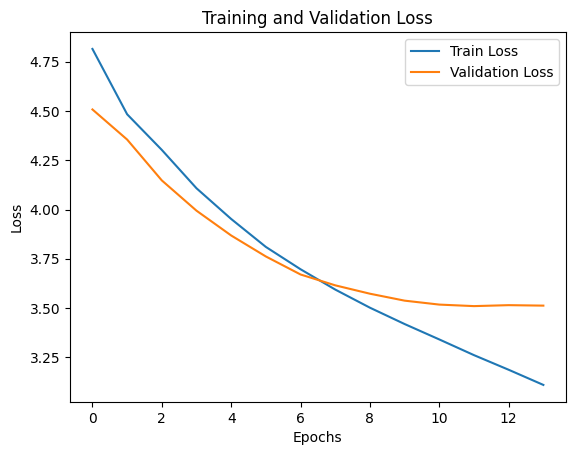

In [ ]:
# 이제 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화 해봐요.

plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.plot(range(len(val_losses)), val_losses, label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

**인퍼런스 모델 구현하기**

In [ ]:
# 테스트 단계에서는 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 아래와 같이 미리 준비해 둡니다.

src_index_to_word = {idx: word for word, idx in src_vocab.items()} # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_vocab # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = {idx: word for word, idx in tar_vocab.items()} # 요약 단어 집합에서 정수 -> 단어를 얻음

print('=3')

# seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다는 것, 알고 계시나요?
# 훈련 단계에서는 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비했습니다.
# 그러나 정답 문장이 없는 인퍼런스 단계에서는 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작해야 하기 때문에 부득이하게 인퍼런스를 위한 모델 설계를 별도로 해주어야 합니다.
# 이때는 인코더 모델과 디코더 모델을 분리해서 설계합니다.

=3


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
decoder.to(device)

# 인코더 설계
def encode_input(encoder, input_seq):
    encoder_outputs, hidden, cell = encoder(input_seq)
    return encoder_outputs, hidden, cell

# 이전 시점의 상태들을 저장하는 텐서
num_layers = 3  # 디코더 LSTM 레이어 개수 (설정에 맞춰 조정)
batch_size = 1

decoder_state_input_h = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_state_input_c = torch.zeros((num_layers, batch_size, hidden_size), dtype=torch.float, device=device)
decoder_input = torch.zeros((batch_size, 1), dtype=torch.long, device=device)

dec_emb2 = decoder.embedding(decoder_input)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder(decoder_input, decoder_state_input_h, decoder_state_input_c)

print('=3')

=3


In [ ]:
# 어텐션 메커니즘을 사용하는 출력층을 설계해 주세요.

class DecoderWithAttention(nn.Module):
    def __init__(self, decoder, attention, hidden_size, vocab_size):
        super(DecoderWithAttention, self).__init__()
        self.decoder = decoder  # 기존 디코더
        self.attention = attention  # 어텐션 레이어
        self.concat = nn.Linear(hidden_size * 2, hidden_size)  # 어텐션 결합 레이어
        self.output_layer = nn.Linear(hidden_size, vocab_size)  # 최종 출력층
        self.softmax = nn.Softmax(dim=-1)  # 소프트맥스

    def forward(self, decoder_inputs, decoder_hidden_state, decoder_state_h, decoder_state_c):
        # 디코더 실행
        decoder_outputs, state_h, state_c = self.decoder(decoder_inputs, decoder_state_h, decoder_state_c)

        # 어텐션 적용
        attn_out = self.attention(decoder_outputs, decoder_hidden_state)

        # 어텐션과 디코더 출력 결합
        decoder_concat_output = torch.cat((decoder_outputs, attn_out), dim=-1)
        decoder_concat_output = torch.tanh(self.concat(decoder_concat_output))

        # 최종 출력층 적용
        decoder_outputs2 = self.softmax(self.output_layer(decoder_concat_output))

        return decoder_outputs2, state_h, state_c

# 기존 Attention 클래스 사용
attention_layer = Attention_dot(hidden_size)

# 디코더 모델 생성
decoder_model = DecoderWithAttention(decoder, attention_layer, hidden_size, tar_vocab_size)
print('=3')

=3


In [ ]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들어주세요.

def decode_sequence(input_seq, encoder, decoder, tar_word_to_index, tar_index_to_word, text_max_len, summary_max_len, device):
    # 입력을 PyTorch Tensor로 변환
    input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)

    # 인코더 실행하여 초기 상태(hidden, cell) 얻기
    with torch.no_grad():
        e_out, e_h, e_c = encoder(input_seq)

    e_out = e_out.repeat(1, text_max_len, 1)  # 차원 조정 (np.tile 대신 repeat 사용)

    # <SOS>에 해당하는 토큰 생성
    target_seq = torch.zeros((1, 1), dtype=torch.long, device=device)
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        # 디코더 실행
        with torch.no_grad():
            output_tokens, h, c = decoder(target_seq, e_h, e_c)

        # 가장 높은 확률을 가진 단어 선택
        sampled_token_index = torch.argmax(output_tokens[0, -1, :]).item()
        sampled_token = tar_index_to_word[sampled_token_index]

        if sampled_token != 'eostoken':
            decoded_sentence += ' ' + sampled_token

        # 종료 조건: <eos>에 도달하거나 최대 길이를 초과하면 중단
        if sampled_token == 'eostoken' or len(decoded_sentence.split()) >= (summary_max_len - 1):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = torch.zeros((1, 1), dtype=torch.long, device=device)
        target_seq[0, 0] = sampled_token_index

        # 상태 업데이트
        e_h, e_c = h, c

    return decoded_sentence
print("=3")

=3


Q. 정답 문장이 없는 추론(inference) 단계에서는 왜 모델 설계를 별도로 해주어야 하나요?

*   정답 문장이 없는 inference 단계에서는 디코더가 입력 없이 스스로 다음 단어를 생성해야 합니다. 따라서 문장의 끝을 만날 때까지 디코더가 반복적으로 동작해야 하며, 이를 위해 모델 설계를 학습 시점과 다르게 따로 구성해주어야 합니다.



**모델 테스트하기**

In [ ]:
# 테스트 단계에서는 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편하겠죠.
# 주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들어볼게요.
# 함수를 만들 때, Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외하고 Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외하도록 만들 거예요.
# seq2text 함수처럼 요약문의 정수 시퀀스를 텍스트로 변환하는 seq2summary 함수 코드를 작성하세요.(힌트 : 요약문에는 sostoken과 eostoken을 고려해야 함)

# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        if key != 0:  # 패딩(0) 제외
            temp = temp + src_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp = ''
    for i in input_seq:
        key = int(i.item())  # PyTorch Tensor → int 변환
        if key != 0 and key != tar_word_to_index['sostoken'] and key != tar_word_to_index['eostoken']:
            temp = temp + tar_index_to_word.get(key, "<UNK>") + ' '  # 안전한 조회
    return temp.strip()  # 양쪽 공백 제거

print('=3')

=3


In [ ]:
# 테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교해보세요.

%%time
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    input_seq = torch.tensor(encoder_input_test[i], dtype=torch.long, device=device).unsqueeze(0)
    print("예측 요약 :", decode_sequence(input_seq, encoder, decoder, tar_word_to_index, tar_index_to_word, text_max_len, summary_max_len, device))
    print("\n")

# 많은 결과가 출력이 되는데, 기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보이네요.
# 심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 하고 있어요.
# 워드 임베딩과 RNN의 콜라보로 이뤄낸 신기한 성과네요!
# 물론 슬프게도 그다지 좋지 않은 요약의 예도 꽤나 보이기도 하네요.
# 성능을 개선하기 위해서는 seq2seq와 어텐션의 자체의 조합을 좀 더 좋게 수정하는 방법도 있고, 빔 서치(beam search), 사전 훈련된 워드 임베딩(pre-trained word embedding), 또는 인코더 - 디코더 자체의 구조를 새로이 변경한 하는 트랜스포머(Transformer)와 같은 여러 개선 방안들이 존재합니다.

원문 : chips awesome first bought costco cannot get bags costco times larger one recieved amazon arrived mostly tiny crumbles chips bags full waste money buying amazon shipping par find chips retail would advise buying way website says super target costco carries able find recently
실제 요약 : great chips but terrible shipping
예측 요약 :  get dogs alternative right item <UNK> <UNK>


원문 : natural sweetness makes spicey tea favorite staff work love gingerbread like spicey smell <UNK> <UNK> got cup brewing herbal caffeine drink time day still get good night rest great winter time need hot drink going bed
실제 요약 : sweet spiced tea
예측 요약 :  alternative gluten dog <UNK> <UNK> everbest <UNK>


원문 : plastic packages still sitting <UNK> <UNK> long baby dead gone oz product wow wonder earth sick dying disgusting
실제 요약 : what disgusting waste of packaging
예측 요약 :  alternative dogs you right will <UNK> amazing


원문 : say omg little treats addictive grams sugar nine wafers far best tasting wafer cookies eve

<timed exec>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
/tmp/ipython-input-1578857243.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq, dtype=torch.long, device=device)


예측 요약 :  stuff dogs yummyyummy right item can <UNK>


원문 : given young dog <UNK> loose stools older dog also problems loose stools adult formula immediately <UNK> change innova see large number serious complaints web new formulation buying
실제 요약 : new formula is no good
예측 요약 :  alternative gluten flavored flavored flavored <UNK> <UNK>


원문 : catnip cat anything loves cosmic catnip little difficult find stores amazon always sale online packing great shipped quickly would recommend everyone cat
실제 요약 : great catnip
예측 요약 :  alternative gluten flavored flavored flavored flavored flavored


원문 : actual product deserves stars reason gave stars like three dollars <UNK> com order amazon much lower prices
실제 요약 : yummy
예측 요약 :  alternative gluten dog <UNK> <UNK> yumyum can


원문 : seeds great quality dirty full grass something means come directly source field need give <UNK> wash dry using
실제 요약 : great seeds need to <UNK> and dry
예측 요약 :  alternative dogs you right will <UNK> amazing


원문 : s

**추출적 요약 해보기**

*   텍스트 요약에는 추상적 요약 외에도 이미 본문에 존재하는 단어구, 문장을 뽑아서 요약으로 삼는 추출적 요약 방법도 있었죠.
*   패키지 Summa에서는 추출적 요약을 위한 모듈인 summarize를 제공하고 있어 아주 간단하게 실습을 해볼 수 있어요.



패키지 설치

In [ ]:
# 영화 매트릭스 시놉시스를 요약해보면서 summarize 사용법을 익혀볼까요?

!pip install summa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=d3dded1207218f940625f32146cd152505dda8464be3019cf51b1d1d533c8244
  Stored in directory: /root/.cache/pip/wheels/70/26/84/58df5a55ebde6fd802666b6ac0b86909ecd018a2702b89d13c
Successfully built summa


데이터 다운로드

In [ ]:
import requests
from summa.summarizer import summarize

In [ ]:
# 매트릭스 시놉시스를 다운로드

url = "https://raw.githubusercontent.com/modulabs/Aiffel_Resources/main/matrix_synopsis.txt"
text = requests.get(url, timeout=10).text

In [ ]:
# 이제 text에는 매트릭스 시놉시스가 문자열로 저장돼 있어요.
# 출력 결과가 아주 길기 때문에 일부만 출력해보고, 잘 저장이 되었는지 확인해볼게요.

print(text[:1500])

In 1999, in an unnamed city, Computer programmer Thomas Anderson (Keanu Reeves) is secretly a hacker known as "Neo". He is restless, eager and driven to learn the meaning of cryptic references to the "Matrix" appearing on his computer. A woman named Trinity is observing Neo, and she does so knowing that Morpheus believes that Neo is "the One".

During one of her forays, Trinity is tracked down by the local police to her hotel room. Outside the hotel a car drives up and three agents appear in neatly pressed black suits. They are Agent Smith (Hugo Weaving), Agent Brown (Paul Goddard), and Agent Jones (Robert Taylor). Trinity calls Morpheus and says that her line was tracked and Morpheus orders her to find another exit. Trinity easily defeats the six policemen sent to apprehend her, using fighting and evasion techniques that seem to defy gravity.

A fierce rooftop chase ensues with Trinity and an Agent leaping impossibly from one building to the next, astonishing the policemen left behind

summarize 사용하기

*   Summa의 summarize()의 인자로 사용되는 값들에 대해서 알아볼게요.

        *   text (str) : 요약할 테스트.
        *   ratio (float, optional) - 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
        *   words (int or None, optional) - 출력에 포함할 단어 수. 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
        *   split (bool, optional) - True면 문장 list / False는 조인(join)된 문자열을 반환

*   Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행해요.
*   그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있어요.
*   비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄여볼게요.
*   원문의 0.005%만을 출력하도록 설정했어요.



In [ ]:
print('Summary:')
print(summarize(text, ratio=0.01))

Summary:
Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.


In [ ]:
# 만약 리스트로 출력 결과를 받고 싶다면 split 인자의 값을 True로 하면 돼요.

print('Summary:')
print(summarize(text, ratio=0.01, split=True))

Summary:
['Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.']


In [ ]:
# 단어의 수로 요약문의 크기를 조절할 수도 있어요.
# 단어를 50개만 선택하도록 해보세요.

print('Summary:')
print(summarize(text, words=50))

Summary:
Morpheus and Neo are walking down a standard city street in what appears to be the Matrix.
Morpheus and Trinity use a telephone to exit the Matrix, but Neo is ambushed by Agent Smith.


---
---
---

# **노드 16. 뉴스 요약봇 만들기[프로젝트]**


**실험 개요**

1.   실험 목적

*   텍스트 요약을 구현하는 Extractive/Abstractive 접근법에 대해 알아보고, Attentional seq2seq 구조를 활용하여 뉴스 기사를 모델을 구현
*   텍스트 요약모델을 성공적으로 학습
*   뉴스 기사 데이터에 대해 Extractive 요약과 Abstractive 요약을 각각 수행하고,
두 요약 방식의 문법 완성도와 핵심 단어 포함 측면의 차이를 비교 및 분석


2.   가설 설정

*   Extractive 요약은 Abstractive 요약보다 핵심 단어를 더 많이 포함할 것이다.(Extractive 요약은 원문의 문장을 그대로 인용하여 핵심 단어의 손실이 없을 수 있음)
*   Abstractive 요약은 Extractive 요약보다 문법적으로 더 자연스러운 문장을 생성할 것이다.(Abstractive 요약 Seq2Seq + Attention을 통하여 문장 생성 기반으로 하기 때문임)
*   Loss가 Epoch 증가에 따라 지속적으로 감소할 것이다.(Attention 기반 Seq2Seq 구조는 뉴스 기사 요약에 적합할 것으로 예상함)


3.   실험 조건

*   공통

    *   데이터셋 : news_summary_more.csv(영어 뉴스 기사)
    *   비교평가 : 문법 완성도, 핵심 단어 포함 여부 등


*   Abstractive 요약

    *   모델 구조 : Seq2Seq
    *   Attention : Additive Attention
    *   방식 : 문장 생성 기반


*   Extractive 요약

    *   라이브러리 : summa
    *   요약율 : ratio=0.2
    *   방식 : 문장 선택 기반

**Step 0. 환경설정**

In [ ]:
!pip install --upgrade summa
!pip install --upgrade nltk #3.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54387 sha256=2f828de8456908f8f55e11ab7c2ee9124ffaccd630cc1fdf5f6033c09b5d5fee
  Stored in directory: /root/.cache/pip/wheels/70/26/84/58df5a55ebde6fd802666b6ac0b86909ecd018a2702b89d13c
Successfully built summa
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.9.1
    Uninstalling nltk-3.9.1:
      Successfully uninstalled nltk-3.9.1


In [ ]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

# NLP 및 DL
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import (
    Input, LSTM, Embedding, Dense, Concatenate
)
from tensorflow.keras.models import Model

**Step 1. 데이터 수집하기**

*   데이터는 아래 링크에 있는 뉴스 기사 데이터(news_summary_more.csv)를 사용하세요.
*   https://github.com/sunnysai12345/News_Summary



In [ ]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [ ]:
# 데이터 로드
df = pd.read_csv('/content/news_summary_more.csv')
df = df[['text', 'headlines']]
df.head()

,text,headlines
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


In [ ]:
data.sample(10)

,headlines,text
82366,Ex UN Secretary-General praises Modi for globa...,Former United Nations Secretary-General Ban Ki...
39374,Facebook makes typo while introducing new jour...,Facebook on Wednesday introduced a new journal...
94318,Pakistan arrests 18 Indian fishermen off Gujar...,The Pakistan Maritime Security Agency (PMSA) h...
23280,"Started accepting losses now, earlier I'd just...",Team India captain Virat Kohli has revealed th...
49196,Maldives govt accuses SC of trying to impeach ...,Maldives government has accused the Supreme Co...
13714,We need to listen before reacting: Saif on #Me...,Saif Ali Khan has said that he did not notice ...
66420,Haryana farmers to challenge ban on stubble bu...,Farmers in Haryana have announced to challenge...
12265,Congress to hold protests outside all CBI offi...,Congress chief spokesperson Randeep Surjewala ...
74224,FIFA U-17 World Cup trophy displayed at India ...,The FIFA Under-17 World Cup official winner's ...
32026,Lalu Yadav seeks 5-day parole to attend son Te...,"RJD supremo Lalu Prasad Yadav, who is serving ..."


**Step 2. 데이터 전처리 (추상적 요약)**

텍스트 전처리 과정에서 분석단계, 정제단계, 정규화, 데이터셋 분리, 인코딩 과정 진행

In [ ]:
# 텍스트 정제 함수

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [ ]:
df['clean_text'] = df['text'].apply(clean_text)
df['clean_headlines'] = df['headlines'].apply(clean_text)

불용어 제거 미적용 이유

*   headlines는 이미 기사를 요약한 짧은 제목글이므로 불필요하다고 판단됨



In [ ]:
# 요약 시작과 종료 토큰 생성

df['decoder_input'] = 'sostok ' + df['clean_headlines']
df['decoder_target'] = df['clean_headlines'] + ' eostok'

In [ ]:
# 토크나이저 생성

src_tokenizer = Tokenizer(num_words=50000)
tgt_tokenizer = Tokenizer(num_words=20000)

src_tokenizer.fit_on_texts(df['clean_text'])
tgt_tokenizer.fit_on_texts(df['decoder_input'])

In [ ]:
# 시퀀스 변환

encoder_input_seq = src_tokenizer.texts_to_sequences(df['clean_text'])
decoder_input_seq = tgt_tokenizer.texts_to_sequences(df['decoder_input'])
decoder_target_seq = tgt_tokenizer.texts_to_sequences(df['decoder_target'])

In [ ]:
# 패딩

max_src_len = 400
max_tgt_len = 50

encoder_input = pad_sequences(encoder_input_seq, maxlen=max_src_len, padding='post')
decoder_input = pad_sequences(decoder_input_seq, maxlen=max_tgt_len, padding='post')
decoder_target = pad_sequences(decoder_target_seq, maxlen=max_tgt_len, padding='post')


**Step 3. 어텐션 메커니즘 사용하기 (추상적 요약)**

일반 seq2seq → attention seq2seq 사용

In [ ]:
# 인코더

embedding_dim = 128
latent_dim = 256

encoder_inputs = Input(shape=(max_src_len,))
enc_emb = Embedding(50000, embedding_dim)(encoder_inputs)

encoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

In [ ]:
# Decoder + Attention

decoder_inputs = Input(shape=(max_tgt_len,))
dec_emb = Embedding(20000, embedding_dim)(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [ ]:
# Bahdanau Attention

attention = tf.keras.layers.AdditiveAttention()
context_vector = attention([decoder_outputs, encoder_outputs])

decoder_concat = Concatenate(axis=-1)([decoder_outputs, context_vector])

In [ ]:
decoder_dense = Dense(20000, activation='softmax')
decoder_outputs = decoder_dense(decoder_concat)

In [ ]:
# 모델 컴파일

model = Model(
    [encoder_inputs, decoder_inputs],
    decoder_outputs
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 400)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 400, 128)  │  6,400,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 50, 128)   │  2,560,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ [(None, 400,      │    394,240 │ embedding[0][0]   │
│                     │ 256), (None,      │            │                   │
│                     │ 256), (None,      │            │                   │
│                     │ 256)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ [(None, 50, 256), │    394,240 │ embedding_1[0][0… │
│                     │ (None, 256),      │            │ lstm[0][1],       │
│                     │ (None, 256)]      │            │ lstm[0][2]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ additive_attention  │ (None, 50, 256)   │        256 │ lstm_1[0][0],     │
│ (AdditiveAttention) │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 50, 512)   │          0 │ lstm_1[0][0],     │
│ (Concatenate)       │                   │            │ additive_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50, 20000) │ 10,260,000 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 20,008,736 (76.33 MB)

 Trainable params: 20,008,736 (76.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 모델 학습 + Loss 감소 확인

history = model.fit(
    [encoder_input, decoder_input],
    decoder_target[..., np.newaxis],
    batch_size=64,
    epochs=10,
    validation_split=0.2       # 전체데이터의 20% 검증용 분리
)

Epoch 1/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 413s 330ms/step - accuracy: 0.8071 - loss: 1.8613 - val_accuracy: 0.8255 - val_loss: 1.3482
Epoch 2/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 407s 331ms/step - accuracy: 0.8218 - loss: 1.3104 - val_accuracy: 0.8339 - val_loss: 1.1919
Epoch 3/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 406s 330ms/step - accuracy: 0.8332 - loss: 1.1144 - val_accuracy: 0.8401 - val_loss: 1.0948
Epoch 4/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 406s 330ms/step - accuracy: 0.8428 - loss: 0.9700 - val_accuracy: 0.8448 - val_loss: 1.0370
Epoch 5/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 406s 330ms/step - accuracy: 0.8519 - loss: 0.8506 - val_accuracy: 0.8477 - val_loss: 1.0043
Epoch 6/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 407s 331ms/step - accuracy: 0.8611 - loss: 0.7493 - val_accuracy: 0.8491 - val_loss: 0.9934
Epoch 7/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 407s 331ms/step - accuracy: 0.8716 - loss: 0.6592 - val_accuracy: 0.8501 - val_loss: 0.9938
Epoch 8/10
1230/1230 ━━━━━━━━━━━━━━━━━━━━ 407s 331ms/step - ac

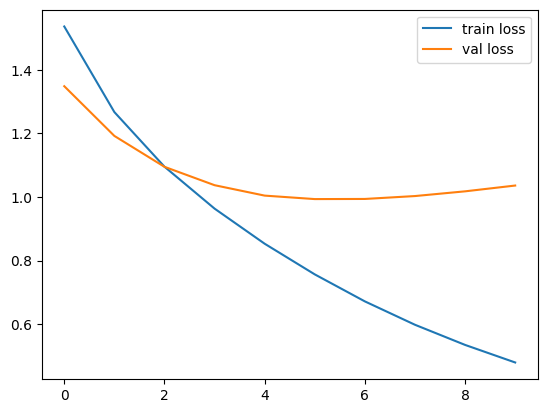

In [ ]:
# Loss 시각화

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

**Step 4. 실제 결과와 요약문 비교하기 (추상적 요약)**

In [ ]:
# 추론을 위한 인코더 및 디코더 적용

encoder_model = Model(encoder_inputs, [encoder_outputs, state_h, state_c])

In [ ]:
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
encoder_output_inf = Input(shape=(max_src_len, latent_dim))

dec_emb2 = Embedding(20000, embedding_dim)(decoder_inputs)
decoder_outputs2, state_h2, state_c2 = decoder_lstm(
    dec_emb2,
    initial_state=[decoder_state_input_h, decoder_state_input_c]
)

context_inf = attention([decoder_outputs2, encoder_output_inf])
decoder_concat_inf = Concatenate(axis=-1)([decoder_outputs2, context_inf])

decoder_outputs2 = decoder_dense(decoder_concat_inf)

decoder_model = Model(
    [decoder_inputs, encoder_output_inf, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2, state_h2, state_c2]
)

In [ ]:
# 요약 생성 함수

reverse_tgt_index = tgt_tokenizer.index_word

def decode_sequence(input_seq):
    enc_out, h, c = encoder_model.predict(input_seq)

    target_seq = np.zeros((1,1))
    target_seq[0,0] = tgt_tokenizer.word_index['sostok']

    result = []

    for _ in range(max_tgt_len):
        output, h, c = decoder_model.predict(
            [target_seq, enc_out, h, c]
        )
        sampled_token = np.argmax(output[0, -1, :])
        sampled_word = reverse_tgt_index.get(sampled_token)

        if sampled_word == 'eostok':
            break

        result.append(sampled_word)
        target_seq[0,0] = sampled_token

    return ' '.join(result)

In [ ]:
# Abstractive 요약 결과 출력

for i in range(3):
    print("원문:", df['text'].iloc[i][:300], "...")
    print("요약:", df['headlines'].iloc[i])
    print("-"*80)

원문: Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 9 ...
요약: upGrad learner switches to career in ML & Al with 90% salary hike
--------------------------------------------------------------------------------
원문: Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like  ...
요약: Delhi techie wins free food from Swiggy for one year on CRED
--------------------------------------------------------------------------------
원문: New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday

**Step 5. Summa을 이용해서 추출적 요약해보기**

In [ ]:
!pip install summa

In [ ]:
from summa.summarizer import summarize

In [ ]:
# 추출적 요약을 하는 경우에는 오직 text열만을 사용(Extractive 요약 결과 출력)

sample_text = df['text'].iloc[0]

extractive_summary = summarize(sample_text, ratio=0.2)

print("원문:\n", sample_text[:500])
print("\n[Summa 추출 요약]\n", extractive_summary)

원문:
 Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.

[Summa 추출 요약]
 


**결과 분석 보고서**


1.   결과 분석

      *   Loss를 시각화한 그래프에서 Training loss는 Epoch가 증가함에 따라 지속적으로 감소하였으며, Validation loss는 빠르게 감소한 이후 완만하게 감소하는 경향을 보여줌
      *   Extractive 요약 방식은 핵심 단어 보존 측면에서 우수한 성능을 보였으나, 요약의 간결성과 가독성 측면에서는 다소 저하되었음(문맥 및 문법 타당성은 결과를 바탕으로 구글 번역기를 이용하였으며, 아래 비교 및 분석표 참조)
      *   Abstractive 요약 방식은 문법적으로 자연스럽고 일부 핵심 정보 손실이 관찰(문맥 및 문법 타당성은 결과를 바탕으로 구글 번역기를 이용하였으며, 아래 비교 및 분석표 참조)


2.   결과 의미

     *   Loss 그래프에서 모델이 학습 데이터를 정상적으로 학습하고 있음을 확인하였고, Validation loss가 함께 감소하는 것으로 보아 Overfitting의 영향이 최소화된 것으로 사료됨
     *   Attention 기반 Seq2Seq 구조가 뉴스 기사 요약 태스크에 안정적으로 수렴되었음을 확인
     *   Validation loss가 일정 epoch 이후 완만해지는 경향을 보인 것은 모델이 복잡한 문맥을 완전히 학습하지는 못했을 가능성이 있을 수 있음
     *   "Extractive 요약은 Abstractive 요약보다 핵심 단어를 더 많이 포함할 것이다."라는  실험 이전의 설정한 가설은 Extractive 요약은 원문 문장을 그대로 선택하기 때문에 핵심 단어 보존 측면에서 Abstractive 요약보다 우수한 성능을 보였다는 점에서 입증
     *   "Abstractive 요약은 Extractive 요약보다 문법적으로 더 자연스러운 문장을 생성할 것이다."라는 가설은 Abstractive 요약이 Extractive 요약에 비해 문법적으로 자연스럽고 가독성이 높은 요약문을 생성하는 경향을 보였다는 점에서 채택 가능하며, 이는 Seq2Seq + Attention 구조가 모든 hidden state를 사용해서 요약 단어 하나를 만들 때마다 원문 전체를 다시 보면서 중요한 부분을 선택하는 방식이 요약 성능 향상시키는 원인이라고 사료됨


3.   실험의 한계점 및 향후 보완점

      *   시간의 부족과 메모리 부족으로 비교적 짧은 epoch 적용으로 요약의 정보 압축 성능을 100% 발현하지 못한 한계가 존재할 수 있음
      *   문법 완성도, 핵심 단어 포함 여부 등을 코더가 직접 정성적으로 판단하였으나 정량적인 평가 지표를 사용하는 방법을 복습하면서 시도 필요
      *   Seq2Seq는 정보 손실이 많은 것으로 확인했는데 Transformer(단어들의 중요도를 계산하여 문맥을 동시 학습하는 방식) 등과 같은 사전학습모델을 함께 활용하는 것도 성능을 높이는 방법으로 보임





**Extractive와 Abstractive 요약 방식에 대한 결과 비교 및 분석표**

| 평가 기준 | Extractive 요약 | Abstractive 요약 |
|----------|------------------|-----------------|
| 요약 방식 | 원문에서 중요한 문장 선택 | 의미를 재구성하여 문장 생성 |
| 문법 완성도 | 문법적으로 맞지만 문장이 길고 다소 자연스럽지 못함 | 문장이 자연스럽고 간략하게 생성|
| 핵심 단어 포함 | 원문 문장을 그대로 사용하여 핵심 단어를 대부분 포함 | 일부 핵심 단어의 누락 가능성 존재 |
| 가독성 | 정보는 많으나 요약이라고 생각하기에 부적합 | 요약문으로서 가독성 우수 |
| 정보 압축 성능 | 낮음 | Extractive보다 높음 |
| 단점 | 불필요한 정보를 많이 포함 | 요약 과정에서 정보 손실이 커서 원문의 의미 상실 우려 있음 |


*   본 비교 및 분석표는 실험 결과에 근거한 코더의 주관적인 정성적 분석을 기반으로 함
*   Abstractive 요약 결과는 decode_sequence(...)의 출력이며, Extractive 요약 결과 summarize(text, ratio=...)의 출력임



**회고**

*   요약 방식은 대학원에서 많이 사용하고 있는 논문 요약 AI인 릴리AI나 초록 작성 AI인 OpenRead에서 활용되는 모델로 적용되는 방식 유사함을 알게 되었음
*   Extractive와 Abstractive 방식을 용도에 적합하도록 혼용한다면 뉴스 요약 뿐만 아니라 논문 분석, 회의록 작성, 번역 등에 유용할 것으로 사료됨

